# Feynn Labs Internship
### **Project-2 STUDY TASK - CODE CONVERSION from R to Python**

> By Kavuluru Lakshmi Srinidhi


###*Importing Libraries*

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture

from scipy.stats import entropy
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

##Step 4: Exploring Data

Code in R -


```
 R> library("MSA")
 R> data("mcdonalds", package = "MSA")
 R> names(mcdonalds)
 R> dim(mcdonalds)
 R> head(mcdonalds, 3)
```
Converted Code in Python -


In [3]:
# Read Case Study: Fast Food Dataset from csv file
dataset=pd.read_csv("mcdonalds.csv")

# Display column names
print(dataset.columns.tolist())

# Display dimensions of the dataset
print(dataset.shape)

# Display the first three rows
print(dataset.head(3))

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


Code in R -
```
R> MD.x <- as.matrix(mcdonalds[, 1:11])
R> MD.x <- (MD.x == "Yes") + 0
R> round(colMeans(MD.x), 2)
```
Converted Code in Python -

In [4]:
# Extract the first 11 columns
x = dataset.iloc[:, 0:11]

# Replace "Yes" with 1 and other values with 0 in df
x_df=x.replace("Yes",1).replace("No",0)

# Convert the DataFrame to a NumPy array
x = x_df.values

# Calculate the column means and round them to two decimal places
column_means = np.round(np.mean(x, axis=0), 2)

print(column_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


###*Principal components analysis*

Here, we
calculate principal components because we use the resulting components to rotate
and project the data for the perceptual map.

Code in R -

```
R> MD.pca <- prcomp(MD.x)
R> summary(MD.pca)
```
Converted Code in Python -


In [5]:
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(x)

# Print a summary of the PCA results
explained_variance = pca.explained_variance_ratio_
standard_deviation = np.sqrt(pca.explained_variance_)
cumulative_variance = np.cumsum(explained_variance)

principal_components = [f'PC{i+1}' for i in range(len(explained_variance))]

# Creating a DataFrame to display the results more clearly
summary_df = pd.DataFrame({
    'Principal Component': principal_components,
    'Standard Deviation': standard_deviation,
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})

print(summary_df.to_string(index=False))

Principal Component  Standard Deviation  Explained Variance  Cumulative Variance
                PC1            0.757050            0.299447             0.299447
                PC2            0.607456            0.192797             0.492244
                PC3            0.504619            0.133045             0.625290
                PC4            0.398799            0.083096             0.708386
                PC5            0.337405            0.059481             0.767866
                PC6            0.310275            0.050300             0.818166
                PC7            0.289697            0.043849             0.862015
                PC8            0.275122            0.039548             0.901563
                PC9            0.265251            0.036761             0.938323
               PC10            0.248842            0.032353             0.970677
               PC11            0.236903            0.029323             1.000000


Code in R -
```
R> print(MD.pca, digits = 1)
```
Converted Code in Python -


In [6]:
# Round standard deviations to 1 decimal place
standard_deviation_rounded = np.round(standard_deviation, 1)

# Print the standard deviations
print("Standard deviations (1, .., p=11):")
print(standard_deviation_rounded)
print("");

# Creating the rotation matrix
rotation_matrix = pd.DataFrame(pca.components_.T, index=dataset.iloc[:, 0:11].columns, columns=principal_components)

# Round the rotation matrix to 3 decimal places for better readability
rotation_matrix = rotation_matrix.round(3)

# Print the rotation matrix
print(rotation_matrix)


Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy      -0.477  0.364 -0.304  0.055 -0.308  0.171 -0.281  0.013  0.572   
convenient -0.155  0.016 -0.063 -0.142  0.278 -0.348 -0.060 -0.113 -0.018   
spicy      -0.006  0.019 -0.037  0.198  0.071 -0.355  0.708  0.376  0.400   
fattening   0.116 -0.034 -0.322 -0.354 -0.073 -0.407 -0.386  0.590 -0.161   
greasy      0.304 -0.064 -0.802  0.254  0.361  0.209  0.036 -0.138 -0.003   
fast       -0.108 -0.087 -0.065 -0.097  0.108 -0.595 -0.087 -0.628  0.166   
cheap      -0.337 -0.611 -0.149  0.119 -0.129 -0.103 -0.040  0.140  0.076   
tasty      -0.472  0.307 -0.287 -0.003 -0.211 -0.077  0.360 -0.073 -0.639   
expensive   0.329  0.601  0.024  0.068 -0.003 -0.261 -0.068  0.030  0.067   
healthy    -0.214  0.077  0.192  0.763  0.288 -0.178 -0.350  0.176 -0.186   
disgusting  0.375 -0.140 -0.089  0.370 -0.729 -0.211 -0.027 -0.167 -0.0

Code in R -

```
R> library("flexclust")
R> plot(predict(MD.pca), col = "grey")
R> projAxes(MD.pca)
```

Code in Python -

In [8]:
pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59221 sha256=1b754827e8cd09cb85fe274638c8abf9ac919f9552248b3f85eaf2d9a69720be
  Stored in directory: /root/.cache/pip/wheels/45/b1/91/212510cab723ee76a25180836e8897f926820382374184b017
Successfully built bioinfokit


In [9]:
from bioinfokit.visuz import cluster

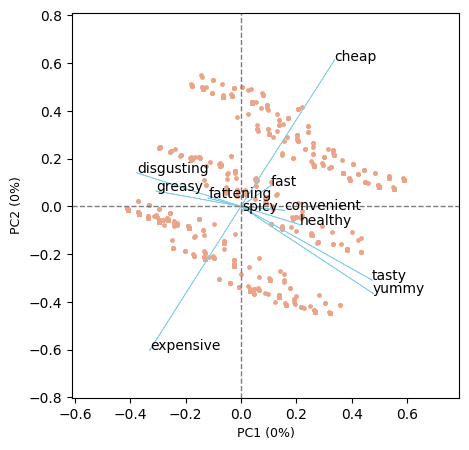

In [11]:
load = (pca.components_)
cluster.biplot(cscore=MD_pca, loadings=-load, labels=dataset.columns.values,var1=0,var2=0, show=True, dim=(5, 5))

##Step 5: Extracting Segments

###*Using k-Means*

We calculate solutions for two to eight market segments using standard k-means
analysis with ten random restarts (argument nrep).

Code in R -

```
R> set.seed(1234)
R> MD.km28 <- stepFlexclust(MD.x, 2:8, nrep = 10, + verbose = FALSE)
R> MD.km28 <- relabel(MD.km28)

R> plot(MD.km28, xlab = "number of segments")
```

Code in Python -

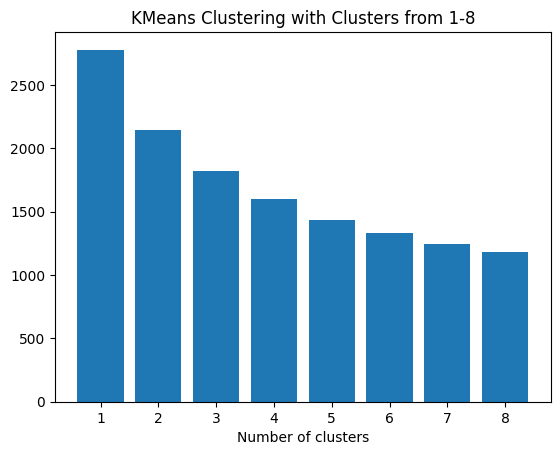

In [12]:
np.random.seed(1234)
def run_kmeans(data, cluster_no_min, cluster_no_max, nrep):
    dis = []
    MD_kmeans28 = {}
    for clusters_no in range(cluster_no_min, cluster_no_max):
      kmeans = KMeans(n_clusters=clusters_no, n_init=nrep, random_state=1234)
      kmeans.fit(data)
      dis.append((kmeans.inertia_))
      MD_kmeans28[str(clusters_no)] = kmeans
      if (clusters_no == 4):
        labels_k4=kmeans.labels_
    return dis,MD_kmeans28, labels_k4

# Run KMeans clustering for clusters 1 to 8 with 10 repetitions each
nrep = 10
dis,MD_kmeans28,labels_k4 = run_kmeans(x, 1, 9, nrep)

# Visualize the results
plt.bar(range(1,9), dis)
plt.title('KMeans Clustering with Clusters from 1-8')
plt.xlabel("Number of clusters")
plt.show()

*Ensemble Method - bootstrap sample (randomly drawn subsets) of the data.*

Code in R -

```
R> set.seed(1234)
R> MD.b28 <- bootFlexclust(MD.x, 2:8, nrep = 10,+ nboot = 100)

R> plot(MD.b28, xlab = "number of segments",+ ylab = "adjusted Rand index")
```



Code in Python -

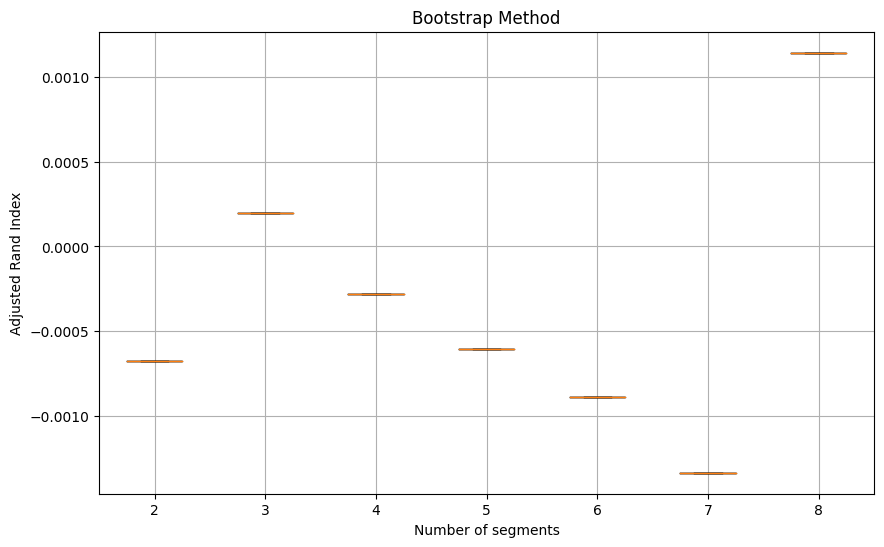

In [13]:
np.random.seed(1234)
def generate_bootstrap_samples(data, nboot):
    #Generate bootstrap samples
    bootstrap_samples = []
    for _ in range(nboot):
        bootstrap_sample = resample(data, random_state=1234)
        bootstrap_samples.append(bootstrap_sample)
    return bootstrap_samples

def calculate_adjusted_rand_index(data, bootstrap_samples, cluster_no_min, cluster_no_max, nrep):
    #Calculate Adjusted Rand Index for different number of segments
    adjusted_rand_index = []
    for k in range(cluster_no_min, cluster_no_max):
        stability_scores = []
        for bootstrap_sample in bootstrap_samples:
            kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
            kmeans.fit(bootstrap_sample)
            cluster_labels = kmeans.predict(bootstrap_sample)
            true_labels = kmeans.predict(data)
            stability_score = adjusted_rand_score(true_labels, cluster_labels)
            stability_scores.append(stability_score)
        adjusted_rand_index.append(stability_scores)

    return np.array(adjusted_rand_index).T

# Generate bootstrap samples
nboot=100
bootstrap_samples = generate_bootstrap_samples(x, nboot)

# Calculate Adjusted Rand Index
nrep=10
adjusted_rand_index = calculate_adjusted_rand_index(x, bootstrap_samples, 2,9, nrep)


# Create boxplot of Adjusted Rand Index
plt.figure(figsize=(10, 6))
plt.boxplot(adjusted_rand_index,labels=range(2,9), whis=10)
plt.title("Bootstrap Method")
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.grid(True)
plt.show()

We gain further insights into the structure of the four-segment solution with a
gorge plot:

Code in R -

```
R> histogram(MD.km28[["4"]], data = MD.x, xlim = 0:1)
```


Code in Python -

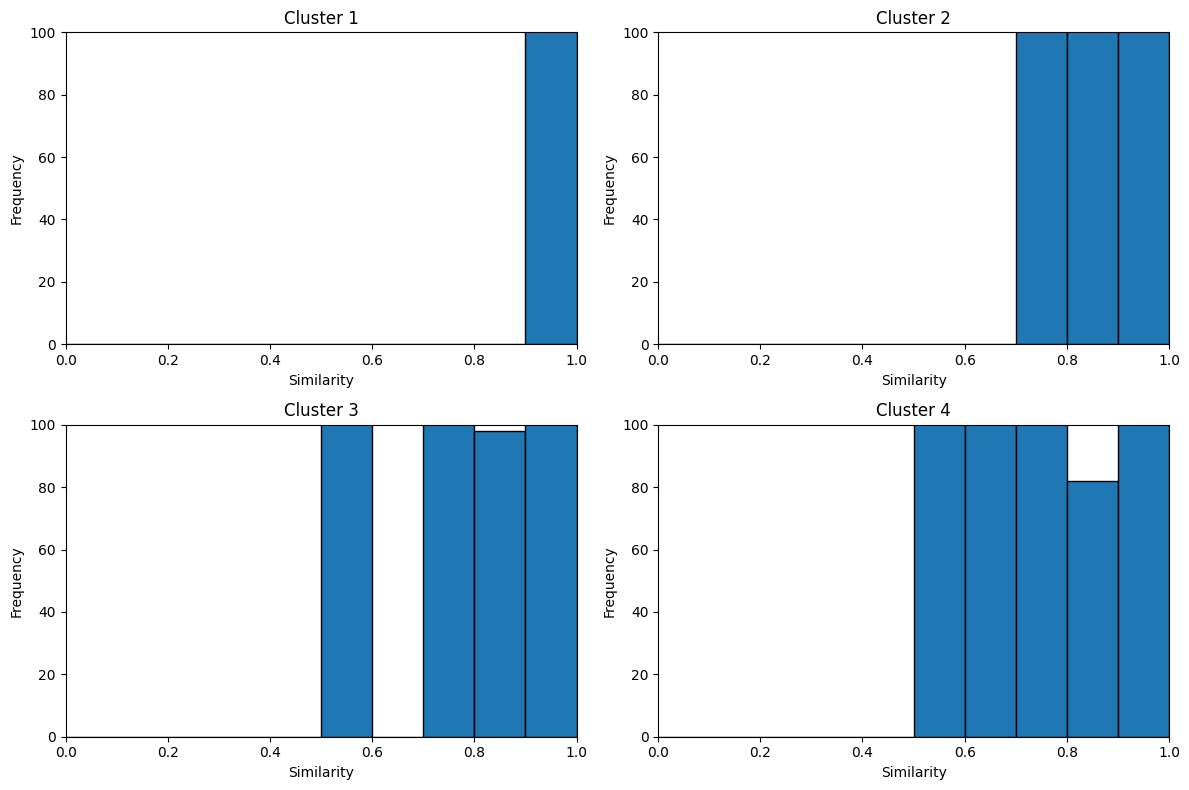

In [14]:
range_values = (0, 1)
num_bins = 10

# Create the figure and axes for a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i in range(1, 5):
    # Predict labels and compute similarities
    labels = MD_kmeans28[str(i)].predict(x)
    similarities = MD_kmeans28[str(i)].transform(x).min(axis=1)

    row = (i - 1) // 2
    col = (i - 1) % 2

    # Compute histogram data
    hist, bins = np.histogram(similarities, bins=num_bins, range=range_values)

    # Plot histogram
    axs[row, col].bar(bins[:-1], hist, width=(bins[1]-bins[0]), align='edge', edgecolor='black')

    # Set labels and title
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(f'Cluster {i}')

    # Set axis limits and ticks
    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, 100)  # Adjust this limit based on your data
    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])


plt.tight_layout()
plt.show()

*SLSA Plot:*

Code in R -
```
R> slsaplot(MD.km28)
```

Code in Python -

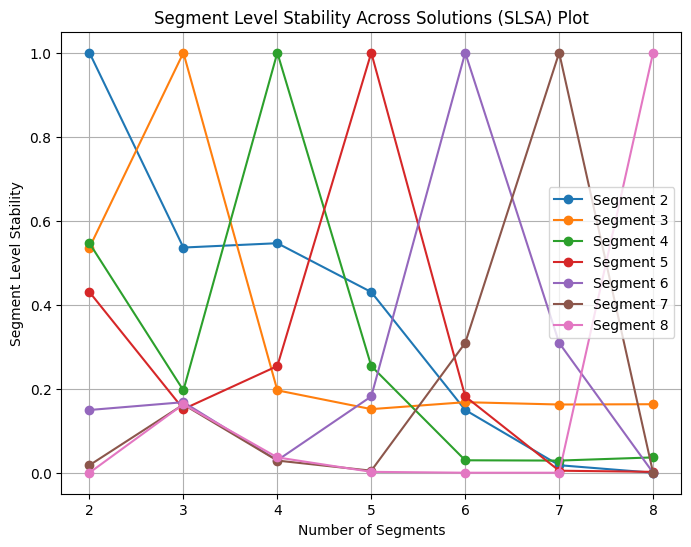

In [15]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_kmeans28[str(segment)].predict(x)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid()

plt.show()

*SLSW Plot:*

Code in R -

```
R> MD.k4 <- MD.km28[["4"]]
R> MD.r4 <- slswFlexclust(MD.x, MD.k4)

R> plot(MD.r4, ylim = 0:1, xlab = "segment number",+ ylab = "segment stability")
```



Code in Python -

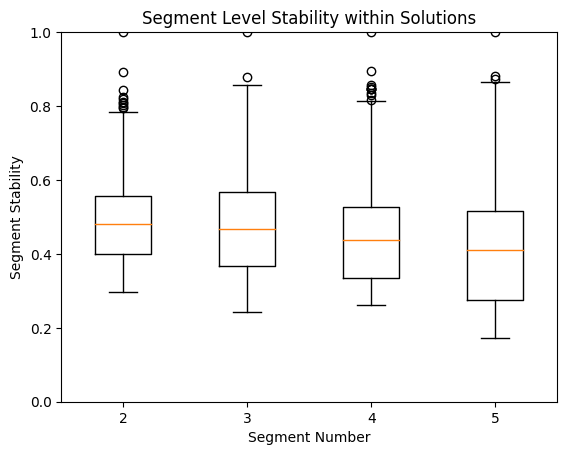

In [16]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_kmeans28[segment].predict(x)
    segment_similarities[segment] = MD_kmeans28[segment].transform(x).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

###*Using Mixtures of Distributions*

Code in R -


```
R> library("flexmix")
R> set.seed(1234)
R> MD.m28 <- stepFlexmix(MD.x ~ 1, k = 2:8, nrep = 10,+ model = FLXMCmvbinary(), verbose = FALSE)
R> MD.m28
```



Code in Python -

In [17]:
np.random.seed(1234)
def getInfoCriteria(data, k_range, nrep):
    results = []
    for k in k_range:
      model = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
      model.fit(data)
      log_likelihood = -model.inertia_
      aic = -2 * log_likelihood + 2 * k
      bic = -2 * log_likelihood + np.log(data.shape[0]) * k
      labels = model.labels_
      counts = np.bincount(labels)
      probs = counts / float(counts.sum())
      icl = bic - entropy(probs)
      results.append((k, log_likelihood, aic, bic, icl))

    return results

k_range = range(2, 9)
nrep = 10

results = getInfoCriteria(x, k_range, nrep)

# Print the results
print("k\tlogLik\t\tAIC\t\tBIC\t\tICL")
for k, log_likelihood, aic, bic, icl in results:
    print(f"{k}\t{log_likelihood:.4f}\t{aic:.4f}\t{bic:.4f}\t{icl:.4f}")

k	logLik		AIC		BIC		ICL
2	-2145.5037	4295.0075	4305.5702	4304.9045
3	-1818.7177	3643.4353	3659.2795	3658.2097
4	-1604.1073	3216.2146	3237.3401	3235.9894
5	-1434.6104	2879.2208	2905.6278	2904.0360
6	-1331.6524	2675.3049	2706.9932	2705.2284
7	-1248.4179	2510.8358	2547.8055	2545.8848
8	-1182.1000	2380.2000	2422.4511	2420.4339


Code in R -
```
R> plot(MD.m28,+ ylab = "value of information criteria (AIC, BIC, ICL)")
```

COde in Python -

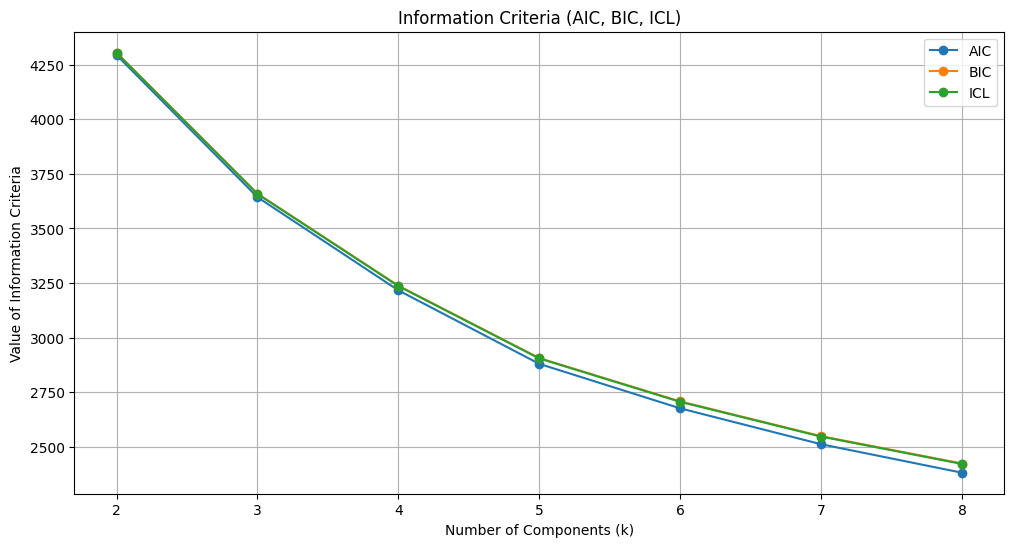

In [18]:
# Plotting AIC, BIC and ICL
results_array = np.array(results)

plt.figure(figsize=(12, 6))
plt.plot(results_array[:, 0], results_array[:, 2], label='AIC', marker='o', linestyle='-')
plt.plot(results_array[:, 0], results_array[:, 3], label='BIC', marker='o', linestyle='-')
plt.plot(results_array[:, 0], results_array[:, 4], label='ICL', marker='o', linestyle='-')

plt.xlabel('Number of Components (k)')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')

plt.legend()
plt.grid(True)
plt.show()



Code in R -

```
R> MD.m4 <- getModel(MD.m28, which = "4")
R> table(kmeans = clusters(MD.k4),+ mixture = clusters(MD.m4))

R> MD.m4a <- flexmix(MD.x ~1, cluster = clusters(MD.k4),+ model = FLXMCmvbinary())
R> table(kmeans = clusters(MD.k4),+ mixture = clusters(MD.m4a))

```



Code in Python -

In [19]:
np.random.seed(1234)
k=4
nrep = 10

###
results = {}
model = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
model.fit(x)
kmeans_clusters = model.predict(x)
results["kmeans"]=kmeans_clusters

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(x)
gmm_clusters = gmm.predict(x)
results["mixture"]=gmm_clusters

results=pd.DataFrame(results)
####
results_k4={}
x_mix=x_df[results['mixture']==3]
model_k4=KMeans(n_clusters=k, n_init=nrep, random_state=1234)
model_k4.fit(x_mix)
k4_clusters = model_k4.predict(x_mix)
results_k4["kmeans"]=k4_clusters
results_k4["mixture"]=3

results_k4=pd.DataFrame(results_k4)
####
#Comparisions
print(pd.crosstab(results["kmeans"],results["mixture"]))
print(pd.crosstab(results["kmeans"],results_k4["kmeans"]))

mixture   0    1   2    3
kmeans                   
0        20  302   0  191
1         2  116  59  189
2        90   30  14  108
3        17  150   1  164
kmeans   0   1   2   3
kmeans                
0       76  52  73  32
1       40  39  51  27
2       27  30  31  11
3       43  35  51  34


Code in R -

```
R> logLik(MD.m4a)
R> logLik(MD.m4)
```



Code in Python -

In [20]:
gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(x)

loglik_m4a = gmm_m4a.score(x)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(x)

loglik_m4 = gmm_m4.score(x)

print("Log-likelihood for MD.m4a:", loglik_m4a)
print("Log-likelihood for MD.m4:", loglik_m4)

Log-likelihood for MD.m4a: 11.727872558164462
Log-likelihood for MD.m4: 11.151316714845965


###*Using Mixtures of Regression Models*

In [21]:
r=pd.value_counts(dataset['Like'])
print(r)
# print(type(dataset['Like'][3]))

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64


In [22]:
rating = dataset['Like']
rating=rating.replace('I hate it!-5','-5').replace('I love it!+5','+5')
rating_=rating
rating=pd.value_counts(rating)
pd.to_numeric(rating)
# print(type(rating[3]))

Like
+3    229
+2    187
0     169
+4    160
+1    152
-5    152
+5    143
-3     73
-4     71
-2     59
-1     58
Name: count, dtype: int64

In [23]:
np.random.seed(1234)

n_components = 2
n_init = 10
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose = False)
gmm_reg2 = model.fit(x_df, rating)

print(gmm_reg2)
cluster_sizes = np.bincount(model.predict(x_df))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 468
2: 985


##Step 6: Profiling Segments

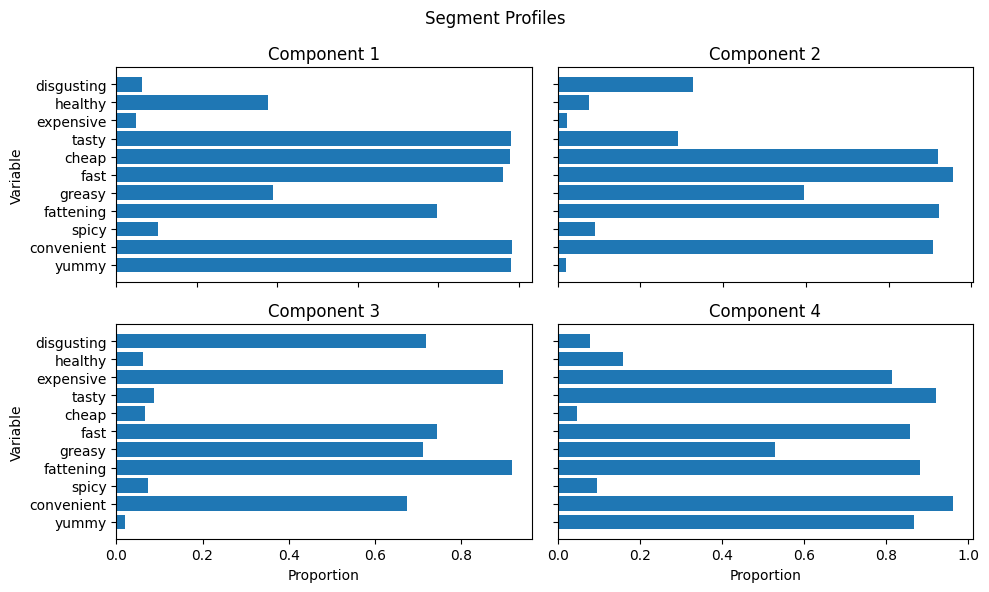

In [24]:
kmeans = MD_kmeans28['4']
labels = kmeans.labels_
MD_mean = x_df.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(x_df.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

In [25]:
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(x_df)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(x_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


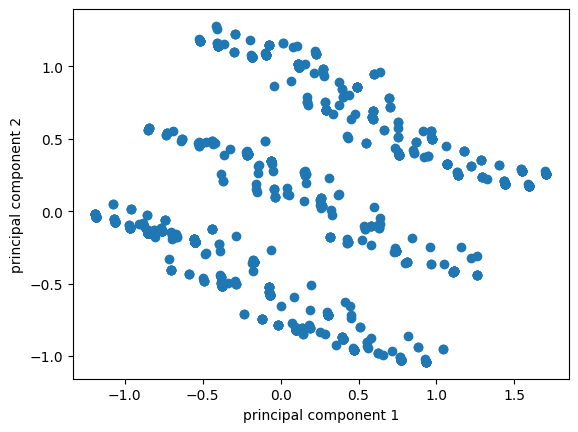

In [26]:
plt.scatter(MD_pca[:, 0], MD_pca[:, 1])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

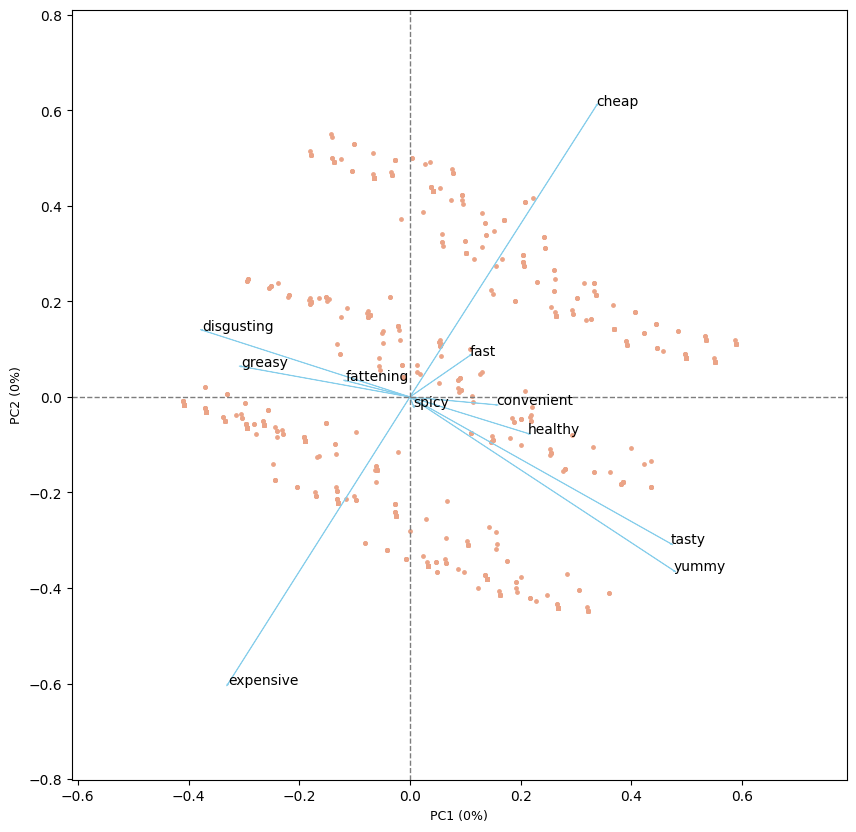

In [27]:
load = (pca.components_)
cluster.biplot(cscore=MD_pca, loadings=-load, labels=dataset.columns.values,var1=0,var2=0, show=True, dim=(10, 10))

##Step 7: Describing Segments

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


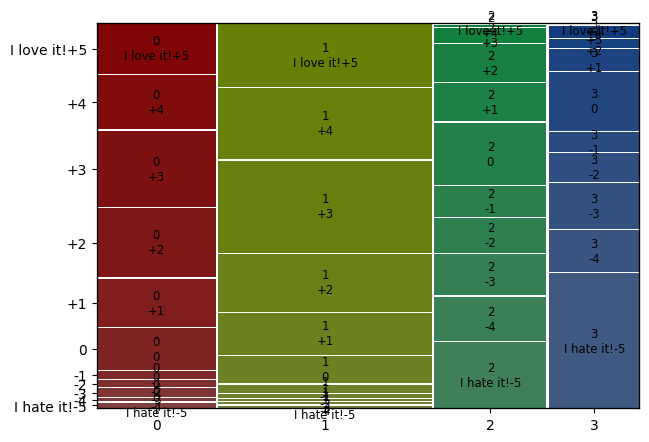

In [28]:
# Mosaic Plot
categories = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in categories:
    dataset[i] = LabelEncoder().fit_transform(dataset[i])
s=dataset.iloc[:,0:11]

k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
kmeans.fit(s)

dataset['Segment'] = kmeans.labels_
crosstab =pd.crosstab(dataset['Segment'],dataset['Like'])

#Reordering cols
crosstab = crosstab[['I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4','I love it!+5']]
crosstab
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()


In [29]:
# MD_kmeans4=MD_kmeans28['4']
# k4 = MD_kmeans4.labels_
k4=labels_k4

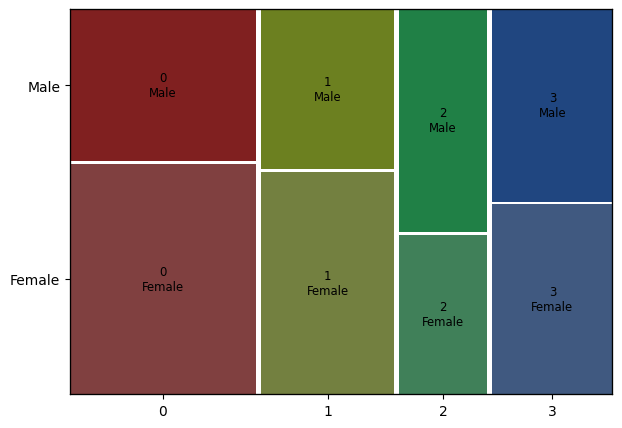

In [30]:
ct = pd.crosstab(k4, dataset['Gender'])
ct
mosaic(ct.stack(),gap=0.01)
plt.show()

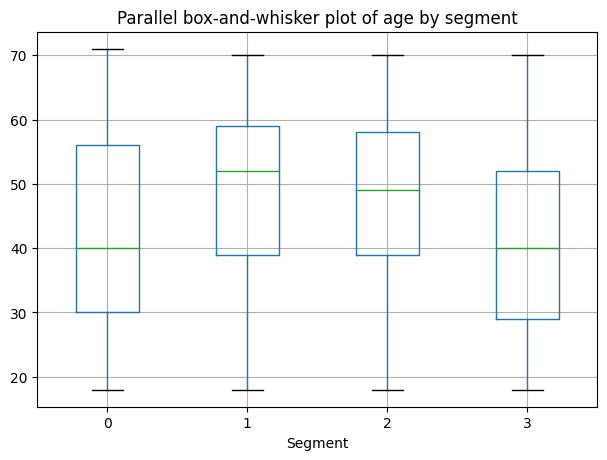

In [31]:
df = pd.DataFrame({'Segment': k4, 'Age': dataset['Age']})

df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

##Step 8: Selecting (the) Target Segment(s)

In [32]:
dataset['VisitFrequency'] = LabelEncoder().fit_transform(dataset['VisitFrequency'])
visit = dataset.groupby('Segment')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,Segment,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [34]:
dataset['Like'] = LabelEncoder().fit_transform(dataset['Like'])
# dataset['Like']
like = dataset.groupby('Segment')['Like'].mean()
like = like.to_frame().reset_index()
like

,Segment,Like
0,0,3.798762
1,1,3.794828
2,2,5.430921
3,3,6.739837


In [35]:
dataset=dataset.replace("Female",1).replace("Male",0)
gender = dataset.groupby('Segment')['Gender'].mean()
gender = gender.to_frame().reset_index()
gender

,Segment,Gender
0,0,0.476780
1,1,0.601724
2,2,0.588816
3,3,0.430894


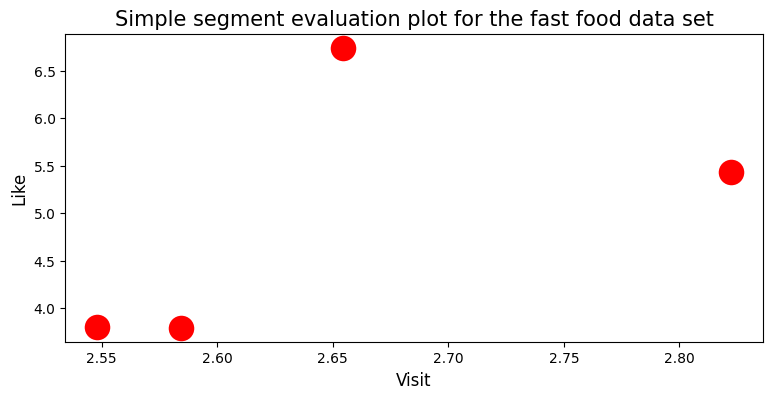

In [36]:
#Plot
segment = gender.merge(like, on='Segment', how='left').merge(visit, on='Segment', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()